# Marketing and Retail Analytics - Capstone Project

## OList Retail

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, we need to manage the inventory cost of this e-commerce company. We need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

### Data Exploration and Cleaning

In the section:
- Reading the datasets.
- Identifying missing values and treating them to the best fit.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. 'Orders' sheet study

In [3]:
# Reading the 'Orders' sheet in Retail Data Set
orders = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset.xlsx", sheet_name = "orders")

In [4]:
# Check the shape
orders.shape

(99441, 7)

In [5]:
# Check the first 5 rows
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [8]:
# Check for duplicate Order ID
orders.order_id.duplicated().sum()

0

In [9]:
# Check for duplicate Customer ID
orders.customer_id.duplicated().sum()

3345

##### Customer ID is not unique because one customer can order multiple items.

##### For this analysis, we are only considering the order status as 'delivered'.

In [11]:
# Check the count of Order Status
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [14]:
# Keeping the "delivered" orders and dropping the rest
orders = orders [orders.order_status == "delivered"]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [15]:
# Check the shape again
orders.shape

(96478, 7)

In [16]:
# Check for null/missing values
orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

#### The two columns having null values are 'order_approved_at' and 'order_delivered_timestamp'. We will treat the missing values as below:
- 'order_approved_at' = 'order_purchare_timestamp'
- 'order_delivered_timestamp' = 'order_estimated_delivery_date'

In [17]:
# Imputing the null values of the two columns
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace = True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace = True)

In [18]:
# Check for null values again
orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### All null values are removed.

### 2. 'Order Items' sheet study

In [19]:
# Reading the 'Order Items' sheet in Retail Data Set
order_items = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset.xlsx", sheet_name = "order_items")

In [20]:
# Check the shape
order_items.shape

(112650, 6)

In [21]:
# Check the first 5 rows
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [22]:
# Check for null/missing values
order_items.isna().sum().sort_values(ascending= False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

### 3. Customers

In [23]:
# Reading the 'Customers' sheet in Retail Data Set
customers = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset.xlsx", sheet_name = "customers")

In [24]:
# Check the shape
customers.shape

(99441, 4)

In [25]:
# Check the first 5 rows
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [27]:
# Check for null/missing values
customers.isna().sum().sort_values(ascending = False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
# Check for duplicate Customer ID
customers.customer_id.duplicated().sum()

3345

In [29]:
# Drop the duplicates and keep only the first
customers.drop_duplicates(subset="customer_id", keep="first", inplace = True)

In [30]:
# Check the shape again
customers.shape

(96096, 4)

In [31]:
# Check for duplicate Customer ID again
customers.customer_id.duplicated().sum()

0

### 4. Payments

In [32]:
# Reading the 'Payments' sheet in Retail Data Set
payments = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset.xlsx", sheet_name = "payments")

In [33]:
# Check the shape
payments.shape

(103886, 5)

In [34]:
# Check the first 5 rows
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
# Check for null/missing values
payments.isna().sum().sort_values(ascending = False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 5. Products

In [36]:
# Reading the 'Products' sheet in Retail Data Set
products = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset.xlsx", sheet_name = "products")

In [37]:
# Check the shape
products.shape

(32951, 6)

In [38]:
# Check the first 5 rows
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [39]:
# Check for null/missing values
products.isna().sum().sort_values(ascending = False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

#### The columns having null values are 'product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm' and 'product_width_cm'. We will treat the missing values as below:
- 'product_category_name' = the mode of the column
- values of the remaiming columns by checking the skewness of the data in the column

In [40]:
# Checking the mode of the 'product_category_name' column
products["product_category_name"].mode()[0]

'toys'

In [41]:
# Impute the null values of 'the product_category_name' column with 'toys'
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace = True)

In [42]:
# Checking null values once again
products.isna().sum().sort_values(ascending = False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [43]:
# Check the statistical value of the numerical columns 
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


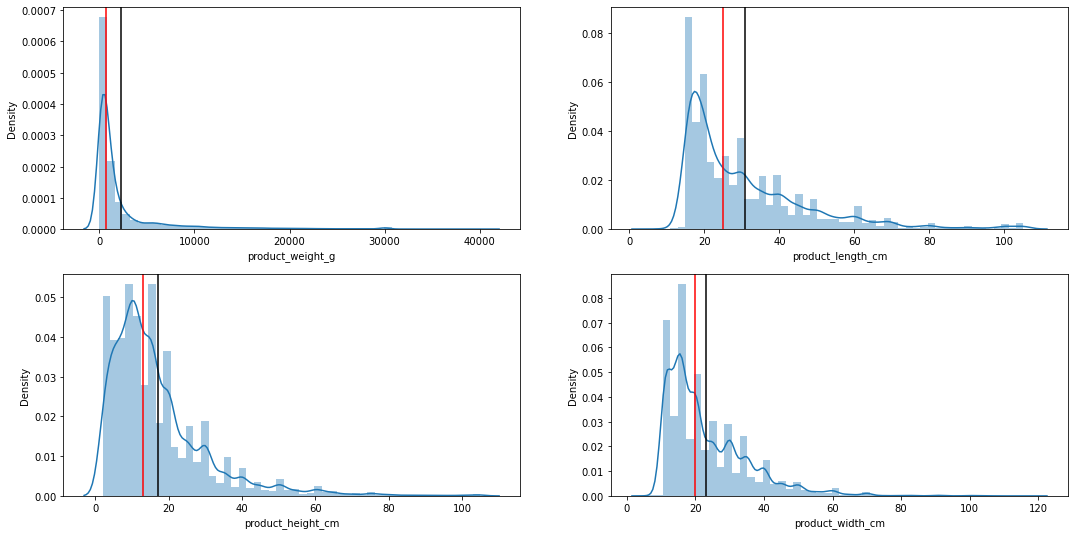

In [44]:
# Check the skewness of the data
plt.figure(figsize=(18,9))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="red")

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="black")
plt.axvline(products.product_length_cm.median(), color="red")

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="black")
plt.axvline(products.product_height_cm.median(), color="red")

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="black")
plt.axvline(products.product_width_cm.median(), color="red")

plt.show()

#### Since there is normal skewness, we will impute the null values with the median of the columns

In [45]:
# Imputing the null values with the median of the columns
products.product_weight_g.fillna(products.product_weight_g.median(), inplace = True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace = True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace = True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace = True)

In [46]:
# Check null values once again
products.isna().sum().sort_values(ascending = False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [47]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,2276.376802,30.814725,16.937422,23.196534
std,4281.926387,16.914005,13.637175,12.078707
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


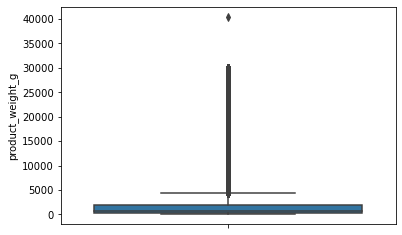

In [48]:
sns.boxplot(y= products.product_weight_g);

### Now we will export the cleaned dataset to start our analysis on Tableau

In [50]:
# Create a Pandas Excel writer using .xlsx writer as the engine
Clean_Data = pd.ExcelWriter(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset_cleaned.xlsx", engine = 'xlsxwriter')

In [51]:
orders.to_excel(Clean_Data, sheet_name = "orders", index = False)
order_items.to_excel(Clean_Data, sheet_name = "order_items", index = False)
customers.to_excel(Clean_Data, sheet_name = "customers", index = False)
payments.to_excel(Clean_Data, sheet_name = "payments", index = False)
products.to_excel(Clean_Data, sheet_name = "products", index = False)

In [52]:
Clean_Data.save()
print("Files exported successfully.")

Files exported successfully.


In [54]:
# Check if the export was successful
import os
os.getcwd()

'C:\\Users\\vijay'

### We will use this cleaned dataset to build necessary visualizations in Tableau

## Market Basket Analysis

#### Market Basket Analysis helps to identify combinations of product categories that are ordered frequently. This is done by creating a simple matrix with product categories in rows and columns and then checking which of the pairs show associations.

#### We will be using the cleaned dataset for our analysis.

In [57]:
# Reading 'order_items' sheet from the cleaned data set
ds1 = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset_cleaned.xlsx", sheet_name = "order_items")

In [58]:
# Check the first 5 rows
ds1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [59]:
# Check the shape
ds1.shape

(112650, 6)

In [60]:
# Reading 'products' sheet from the cleaned data set
ds2 = pd.read_excel(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Retail_dataset_cleaned.xlsx", sheet_name = "products")

In [61]:
# Check the first 5 rows
ds2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [62]:
# Check the shape
ds2.shape

(32951, 6)

In [63]:
# Merging both the data frames using the common column i.e., 'product_id'
ds = pd.merge(ds1, ds2, on = "product_id", how = "inner", indicator = True)

In [64]:
# Check the first 5 rows
ds.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both


In [65]:
# Check the shape
ds.shape

(112650, 12)

#### For our analysis we need only 'order_id' and 'product_category_name'

In [66]:
# Filtering the data frame to two columns
ds = ds[["order_id", "product_category_name"]]
ds.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [67]:
# Check the shape again
ds.shape

(112650, 2)

In [68]:
# Create a Pandas Excel writer using .xlsx Writer as the engine
Market_Basket = pd.ExcelWriter(r"C:\Users\vijay\OneDrive\Desktop\Capstone\Market_Basket_Analysis.xlsx", engine = 'xlsxwriter')

In [69]:
ds.to_excel(Market_Basket, sheet_name = 'order_prod', index = False)

In [71]:
Market_Basket.save()
print("Files exported successfully.")

Files exported successfully.


In [72]:
# Check if the export was successful
import os
os.getcwd()

'C:\\Users\\vijay'

#### We will use this dataset to peform Market Basket Analysis and check the product category association in Tableau.